Perform Hierarchical clustering on the **burger-king-items.txt** dataset.
* what distance metric did you choose, why?
* what linkage method did you choose, why?
* Describe the dendrogram, how many clusters is most optimal?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                 sep = "\t")
print(bk.shape)

bk.head()

(122, 17)


,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


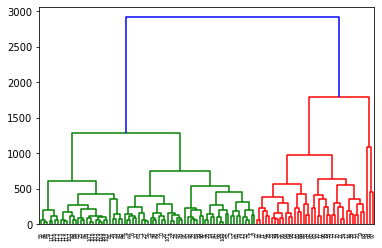

In [11]:
feat = bk.columns[2:13]

X = bk[feat]
X = X.dropna()

hac = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "complete")

hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method='complete'))